In [28]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import sklearn.metrics as met
from sklearn.preprocessing import PolynomialFeatures


In [32]:
 def generate_data(n):
    
    n1 = int(n/2)
    x1_1 = np.random.normal(0.0, 2, (n1,1));
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1));
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
 
    n2 = int(n - n/2)
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    
    data  = np.concatenate((temp1,temp2),axis = 0)
    
    indices = np.random.permutation(n)    
    data = data[indices,:]
    
    return data

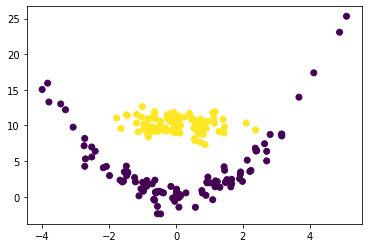

In [22]:


np.random.seed(242)
train_data=generate_data(200)

np.random.seed(12)
test_data=generate_data(100)    
x1=train_data[:,0]
x2=train_data[:,1]
Y=train_data[:,2]

plt.scatter(x=train_data[:,0],y=train_data[:,1],c=train_data[:,2])

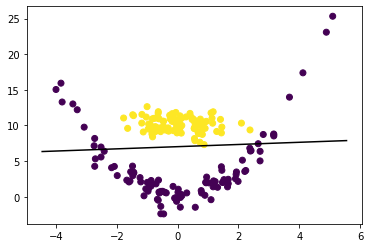

In [23]:
plt.scatter(x=train_data[:,0],y=train_data[:,1],c=train_data[:,2])
log=lm.LogisticRegression(solver='liblinear')
log.fit(train_data[:,:2],train_data[:,2])
ax = plt.gca()
xs = np.array(ax.get_xlim())
ys = -(xs * log.coef_[0][0] + log.intercept_[0])/log.coef_[0][1]
plt.plot(xs, ys, c="k")

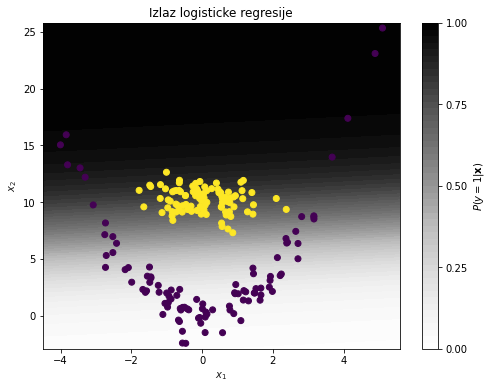

In [24]:
f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(train_data[:,0])-0.5:max(train_data[:,0])+0.5:.05,
                          min(train_data[:,1])-0.5:max(train_data[:,1])+0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]
probs = log.predict_proba(grid)[:, 1].reshape(x_grid.shape)
cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)

ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
ax.autoscale(False)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_data[:, 2])

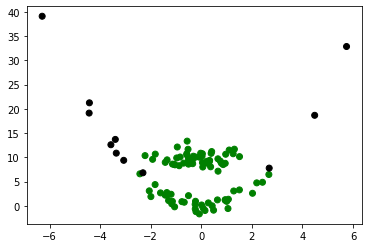

In [25]:
test_p=log.predict(test_data[:,:2])
test_e=test_data[:,2]
test_colors = ['g' if test_p[i] == test_e[i] else 'k' 
               for i in range(len(test_p))]

plt.scatter(x=test_data[:,0],y=test_data[:,1],c=test_colors)

In [26]:
def plot_confusion_matrix(c_matrix):
    
    norm_conf = []
    for i in c_matrix:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys, interpolation='nearest')

    width = len(c_matrix)
    height = len(c_matrix[0])

    for x in range(width):
        for y in range(height):
            ax.annotate(str(c_matrix[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center', color = 'green', size = 20)

    fig.colorbar(res)
    numbers = '0123456789'
    plt.xticks(range(width), numbers[:width])
    plt.yticks(range(height), numbers[:height])
    
    plt.ylabel('Stvarna klasa')
    plt.title('Predvideno modelom')
    plt.show()

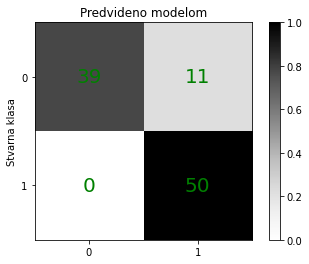

[[39 11]
 [ 0 50]]
tocnost:
0.89
ucestalost pogresne kvalifikacije:
0.10999999999999999
preciznost:
0.819672131147541
odziv:
1.0
specificnost:
0.819672131147541


In [27]:
confusion_matrix=met.confusion_matrix(test_e, test_p)
plot_confusion_matrix(confusion_matrix)
print(confusion_matrix)
print("tocnost:")#a=tp+tn/tp+tn+fp+fn
acc=met.accuracy_score(test_e, test_p)
print(acc)

print("ucestalost pogresne kvalifikacije:")
miss_rate = 1-acc
print(miss_rate)

print("preciznost:")#tp/tp+fp
pres=met.precision_score(test_e, test_p)
print(pres)
print("odziv:")#tp/tp+fn
rec=met.recall_score(test_e, test_p)
print(rec)

print("specificnost:")#tn/tn+fp
spec=confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
print(spec)

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias = False)
train_new = poly.fit_transform(train_data[:,0:2])
test_new = poly.fit_transform(test_data[:,0:2])

f, ax = plt.subplots(figsize=(8, 6))
x_grid, y_grid = np.mgrid[min(train_new[:,0])-0.5:max(train_new[:,0])+0.5:.05,
                          min(train_new[:,1])-0.5:max(train_new[:,1])+0.5:.05]
grid = np.c_[x_grid.ravel(), y_grid.ravel()]
grid=poly.fit_transform(grid)
probs = log_new.predict_proba(grid)[:, 1].reshape(x_grid.shape)

cont = ax.contourf(x_grid, y_grid, probs, 60, cmap="Greys", vmin=0, vmax=1)

ax_c = f.colorbar(cont)
ax_c.set_label("$P(y = 1|\mathbf{x})$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.set_xlabel('$x_1$', alpha=0.9)
ax.set_ylabel('$x_2$', alpha=0.9)
ax.set_title('Izlaz logisticke regresije')
ax.autoscale(False)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_data[:, 2])
plt.show()
